# Natural Language Processing with NLTK

Use computers to identify patterns in language and textual data to help you extract insights for your research

## Hi, I'm Daniel... 

<img src="about.jpg">

"Changing the world through small pieces of software...Understand it through large volume of data"

## I'm interested in how artificial intelligence will shape the way we will interact with technology.

## Let computers do the reading for you...
<img src="search2.png">

## Can you read a significant amount of books from last centure in short time?

In [ ]:
## NLTK can!

<img src="ngram.png" >

## Make machines to make your life easier: expenses tracking... <br/>
<img src="receipt.jpg">

### "COLES" = Groceries

<img src="expenses2.png" width="50%" height="50%">

# We read
# We write
# We listen
# We speak

This is Natural Language Processing

"You can work smarter, let machines work harder" 

# Introducing the challenge
I'm the owner of a succesful online store through Amazon Australia and I hired you, a Marketing Research firm to analyse the reviews the customers are writing in Amazon for a particular set of products
<img src="amazon.jpg" >

## To be able to do this, you will learn some things first. This what you should be able to do after the session:



Manipulate, categorise and analyse textual data to extract information using computational methods.<br/>


Particularly: <br/>

<img src="lo.png">

# So... what is NLTK?


It's NOT trying to understand a baby...
<br/>
<img src="tenor.gif"/>

<img src="NLTK.png"/>
[NLTK (Natural Language ToolKit)](http://www.nltk.org)

<br/>
<b>Hint:</b> Learn python joining our amazing workhops with [@geogarber](https://twitter.com/GeoGarber) at [ResPlat](http://resplat.eventbrite.com) 

## The NLP Pyramid
The most common NLP tasks build one upon another

<img src="nlp_tasks.png"/>

## Using NLTK

* NLTK ([Natural Language Toolkit](http://www.nltk.org/)) is an external library,  you must import it first to use it: 

In [65]:
import nltk

### Access a corpus
#### [Corpus](https://en.wikipedia.org/wiki/Text_corpus) = Large and structured set of texts


NLTK has some [corpus](https://en.wikipedia.org/wiki/Text_corpus) built in. 
You need to download it in case you haven't done it before:

In [66]:
nltk.download('product_reviews_1')


[nltk_data] Downloading package product_reviews_1 to
[nltk_data]     /Users/danielgil/nltk_data...
[nltk_data]   Package product_reviews_1 is already up-to-date!


True

The "product_reviews_1" dataset contains
annotated customer reviews of 5 products from amazon.com.

Let's get the reviews for a particular product, the Nikon Coolpix
<img src="coolpix.jpg">

In [67]:
from nltk.corpus import product_reviews_1
camera_reviews = product_reviews_1.reviews('Nikon_coolpix_4300.txt')

The corpora in <b>product_reviews_1</b> contains several products. Let's see all the products available: 

In [68]:
product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

<b>Hint: </b>In your research you will have the raw text to analyze, come to the next workshop to see how you can load/access raw text or scrap it from the web

### Preprocess a corpus

#### Preprocessing text = Make text ready to be analyzed

[tokenization](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html) is a handy tool to start preprocessing the text.<br/>Here we will cut the text into pieces like sentences or words.  


<img src="tweet.png" width="50%" height="50%"/>

In [69]:
tweet="I finally got through the block of 8 papers from one theoretician alone on my reading list and, in the process, opened up at least double that many newly discovered papers. I may be a bit loopy. Which direction does the lit review hydra function go? #phdlife #phdchat "
words=nltk.tokenize.word_tokenize(tweet)
words[:10]

['I', 'finally', 'got', 'through', 'the', 'block', 'of', '8', 'papers', 'from']

As a result we have a structure of data, called a list. <br/>
<b>Hint:</b> In the next workshop I will discuss in detail the most common data structures and tools that python has available.

For today our corpus is already tokenized, we can access the words and find some statistics in this way:

In [70]:
# get all the words from the corpus, this will give us a list containing all the words, 
# we can use python function len to count the total of words in the corpus.
len(product_reviews_1.words())

73832

Now, let's see how many unique words we have:

In [71]:
# the python function set will return unique words. This is the lexical diversity of the corpus
len(set(product_reviews_1.words()))

5200

We are interested in finding what people are saying good or bad about the products, let's make NLTK read the text and count for us.

In [72]:
fd=nltk.FreqDist(product_reviews_1.words())
fd.most_common(10)

[('.', 3625),
 ('the', 3565),
 (',', 2556),
 ('i', 1988),
 ('to', 1657),
 ('and', 1653),
 ('a', 1507),
 ('it', 1457),
 ('is', 1129),
 ("'", 1092)]

Do you find it useful? I would say no, because we have words and puntuaction that are not contributing to our analysis. We need to clean the text a little bit from stop words (commonly used words such as "the"). 

Using some syntactic analysis, let's get only the adjectives (Part-of-Speech tag - JJ) and normalize the text for my camera reviews

In [73]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
adj=[]
for review in camera_reviews:
    for sent in review.sents():
        tagged_words=nltk.pos_tag(sent)
        for word_tag in tagged_words:
            if word_tag[1]=='JJ' and word_tag[0] not in stop_words:
                adj.append(word_tag[0].lower())
                
print(adj[:10])

['perfect', 'enthusiastic', 'razor', 'sharp', 'small', 'light', 'many', 'easy', 'obvious', 'able']


### Analyse the text

With the text ready to be analyzed, let's make NLTK to read and count again:

In [74]:
fd=nltk.FreqDist(adj)

In [75]:
fd.most_common(10)

[('good', 27),
 ('digital', 22),
 ('great', 22),
 ('easy', 17),
 ('many', 14),
 ('little', 14),
 ('manual', 14),
 ('compact', 13),
 ('excellent', 12),
 ('high', 11)]

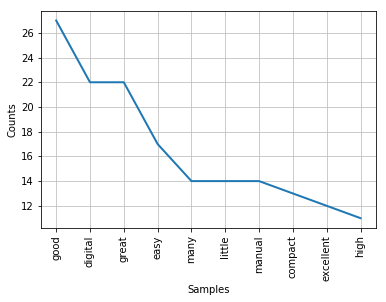

In [76]:
fd.plot(10)

Now, you are probably asking yourself, what do the costumer mean with the word "easy"? 

First guess... print the raw text and try to find what we are looking for?

Mmm... it's hard to inspect the whole text, let's use NLTK built-in functions and see if it makes our life easier

In [77]:
text=nltk.Text(product_reviews_1.words('Nikon_coolpix_4300.txt'))
text.concordance('easy')

Displaying 22 of 22 matches:
her . operating its many features is easy and often obvious - i ' m no annie l
model reviews were positive . it ' s easy to use , and yet very feature rich .
and click , the scene modes are very easy to use and produce good results . th
t s400 . reason for two ? it was not easy sharing one with my teen age kid . t
reat . the 4300 comes with excellent easy to install software i use it on xp a
uchups , redeye , and so on are very easy to alter , and correct . i definatel
e nikon coolpix 4300 is wonderful -- easy to use , high quality , and compact 
 it takes excellent pics and is very easy to use , if you read the manual . if
oads are a snap and quick . controls easy yo use and easy to get to . i ' m ex
and quick . controls easy yo use and easy to get to . i ' m extremely glad i b
ith the features that it has . it is easy enough to use for a beginner like me
 less than many other models ! it is easy to " focus " in on the drawbacks , s
as well . the menus and

It seems like you are ready to produce some insights!!!

# Challenge!
It's time to finish the job. 
As your client I need you to analyze my top 3 products according to revenue reports last quarter. Work one team per product and give me as many insights you find. In particular, I have some specific questions about each product, try to find an answer so I can deliver a report to the board.

# Wrap up!!

Nice job!! I will report your insights to the board :)

Coming back to Natural Language Processing using NLTK we learned great things today...

## Describe concepts: Our first goal
Corpus,  tokenization, Part-of-speech (pos) tagging and concordance. <br/>


## Access and manipulate text
We accessed a default NLTK corpus and remove stop words. <br/>

## Indentify syntactic elements
We used Part-of-speech tags to identify adjectives and nouns in the text.<br/>

## Extract information
We found some information about the context of the words we were analysing. <br/>

# If you use language in your research, NLTK is relevant to you. 
# Come to the next workshop and learn more!
https://research.unimelb.edu.au/infrastructure/research-platform-services/training/nltk